In [1]:
import sys, collections, os, argparse

import matplotlib
import numpy as np
import pandas as pd
from scipy import sparse, io
import matplotlib.pyplot as plt

import scanpy as sc
import anndata
from sklearn.decomposition import TruncatedSVD
import seaborn as sns

%matplotlib inline  
%config InlineBackend.figure_format = 'retina'

In [31]:
adata = pd.read_csv('./raw_mtx.csv', index_col=0)

In [32]:
adata = anndata.AnnData(X=adata.T)

In [37]:
adata.var['mito'] = adata.var.index.str.startswith('MT-')

In [33]:
sc.pp.calculate_qc_metrics(adata, inplace=True)

Compare this chart with the one in down_stream_analysis file.
It shows high similarity with the result from kallisto-aligned data

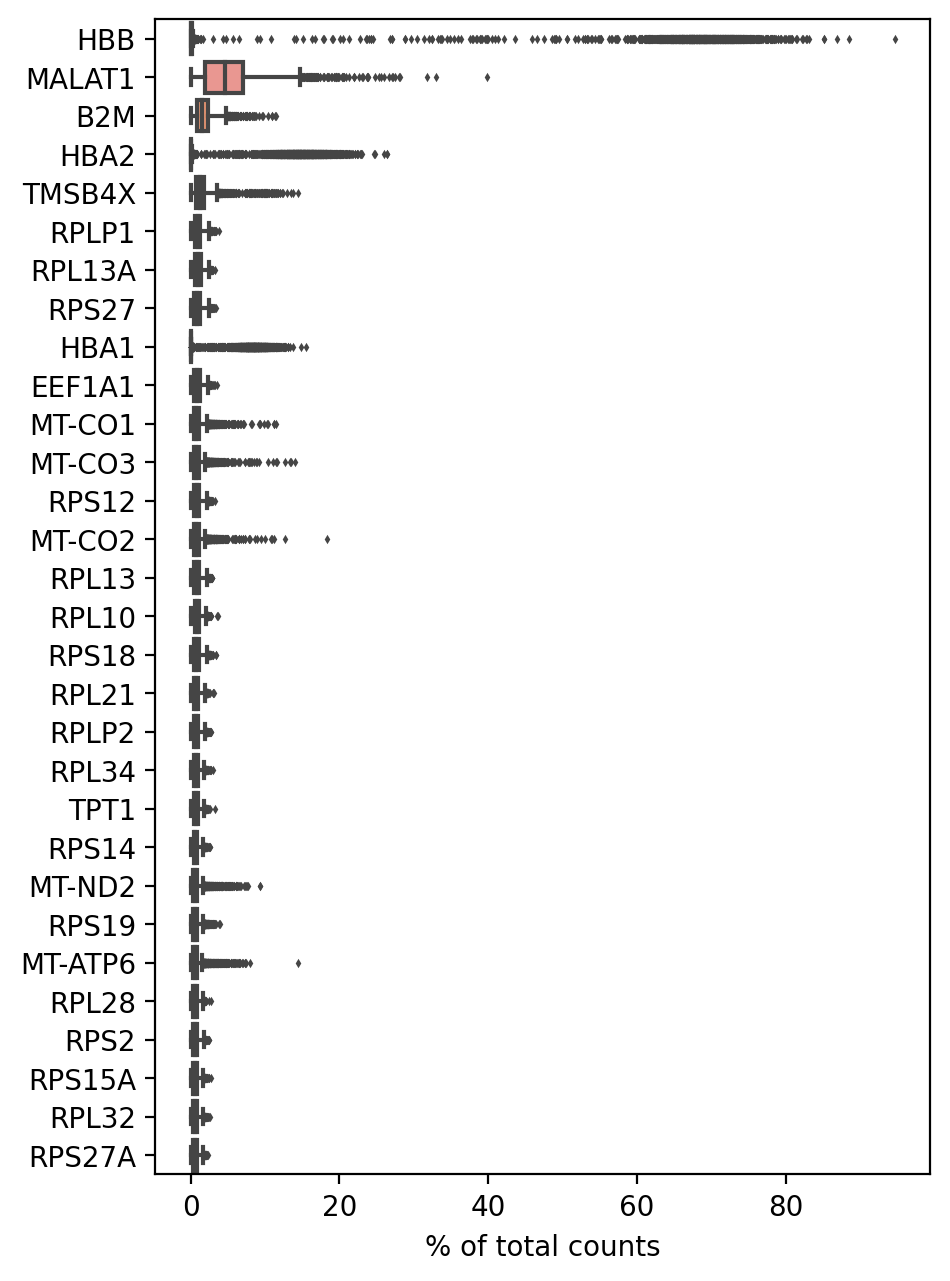

In [34]:
sc.pl.highest_expr_genes(adata)

In [35]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

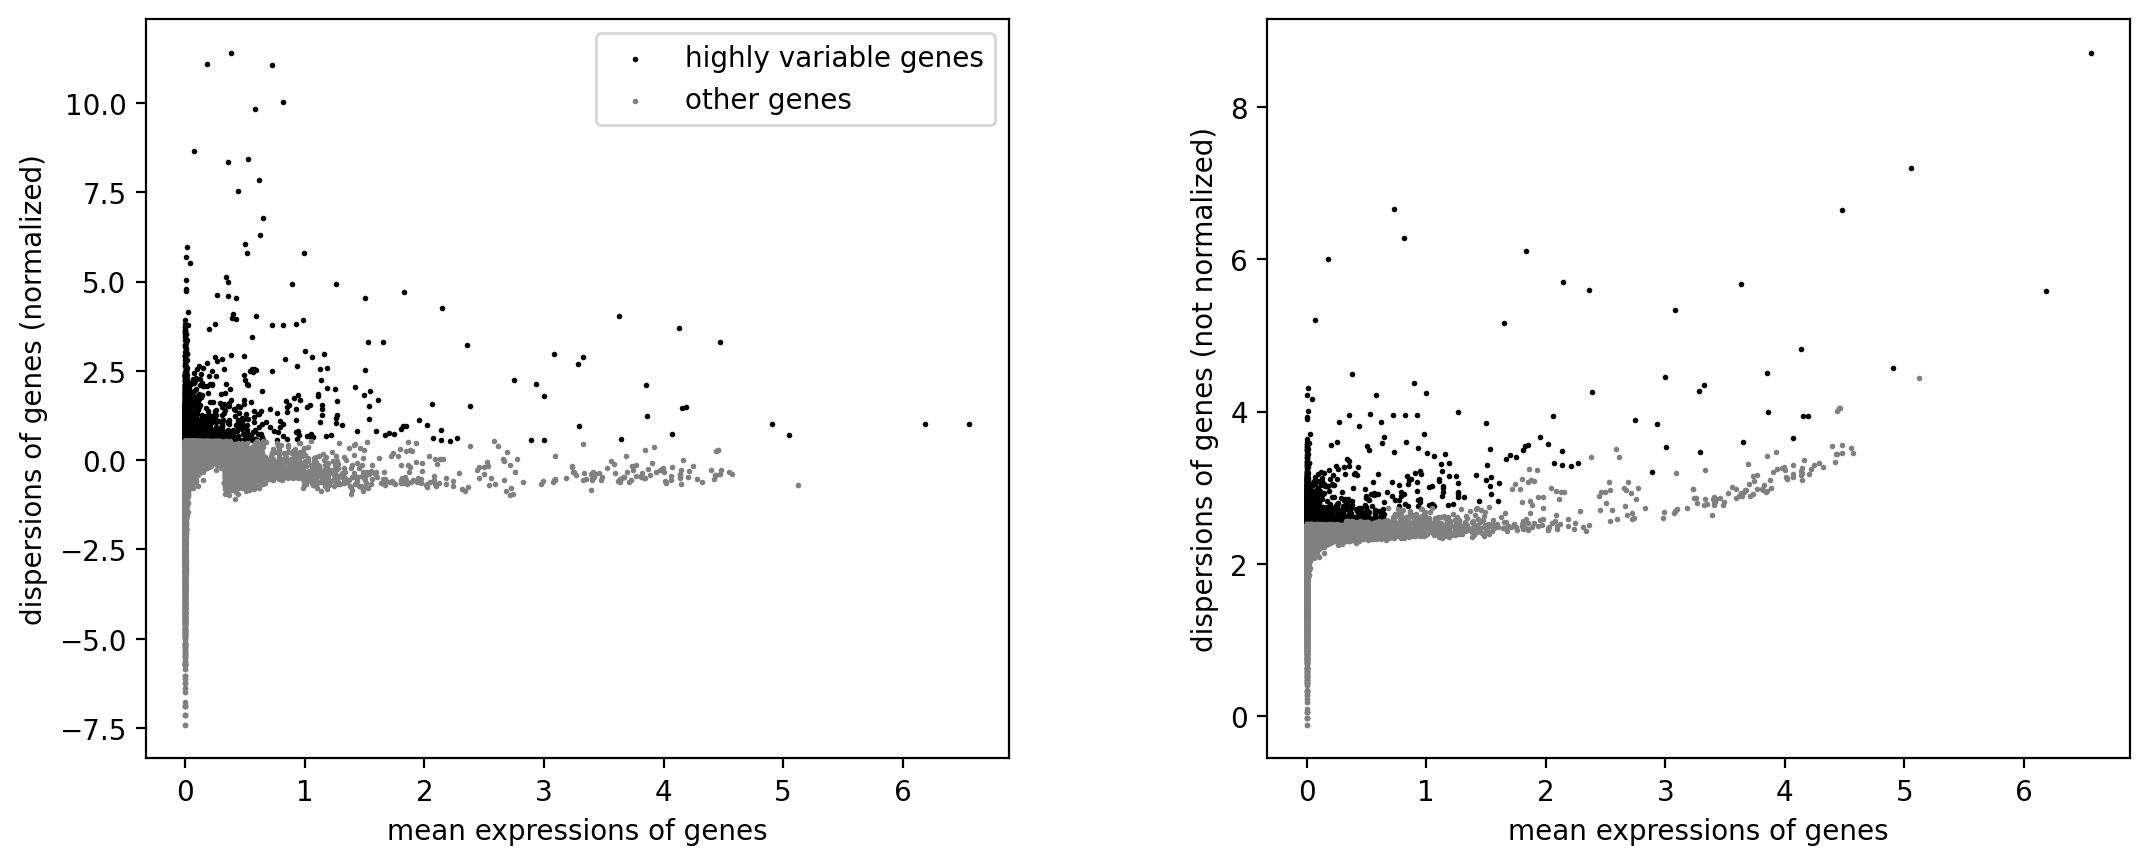

In [36]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=8, min_disp=0.5, n_top_genes=3000, n_bins=20, flavor="seurat")
sc.pl.highly_variable_genes(adata)

In [41]:
sc.pp.scale(adata, max_value=10)

In [42]:
sc.tl.pca(adata, svd_solver='arpack', n_comps=40)

<Axes: ylabel='Proportion'>

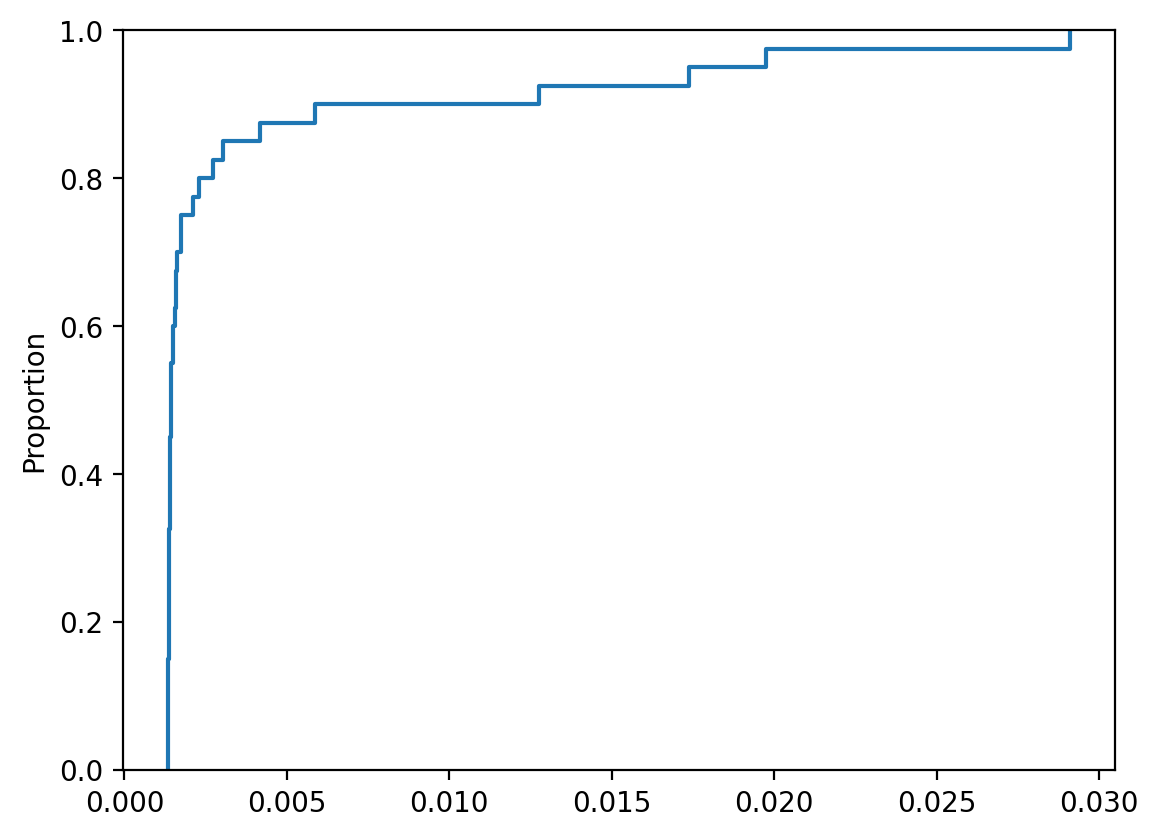

In [43]:
sns.ecdfplot(adata.uns['pca']['variance_ratio'])

In [44]:
# Louvain clustering
# Cluster the cells using Louvain clustering

sc.pp.neighbors(adata, n_neighbors=40, n_pcs=10, knn=True)
sc.tl.louvain(adata, resolution=1)

/Users/liu.yak/anaconda3/envs/bioinfo/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


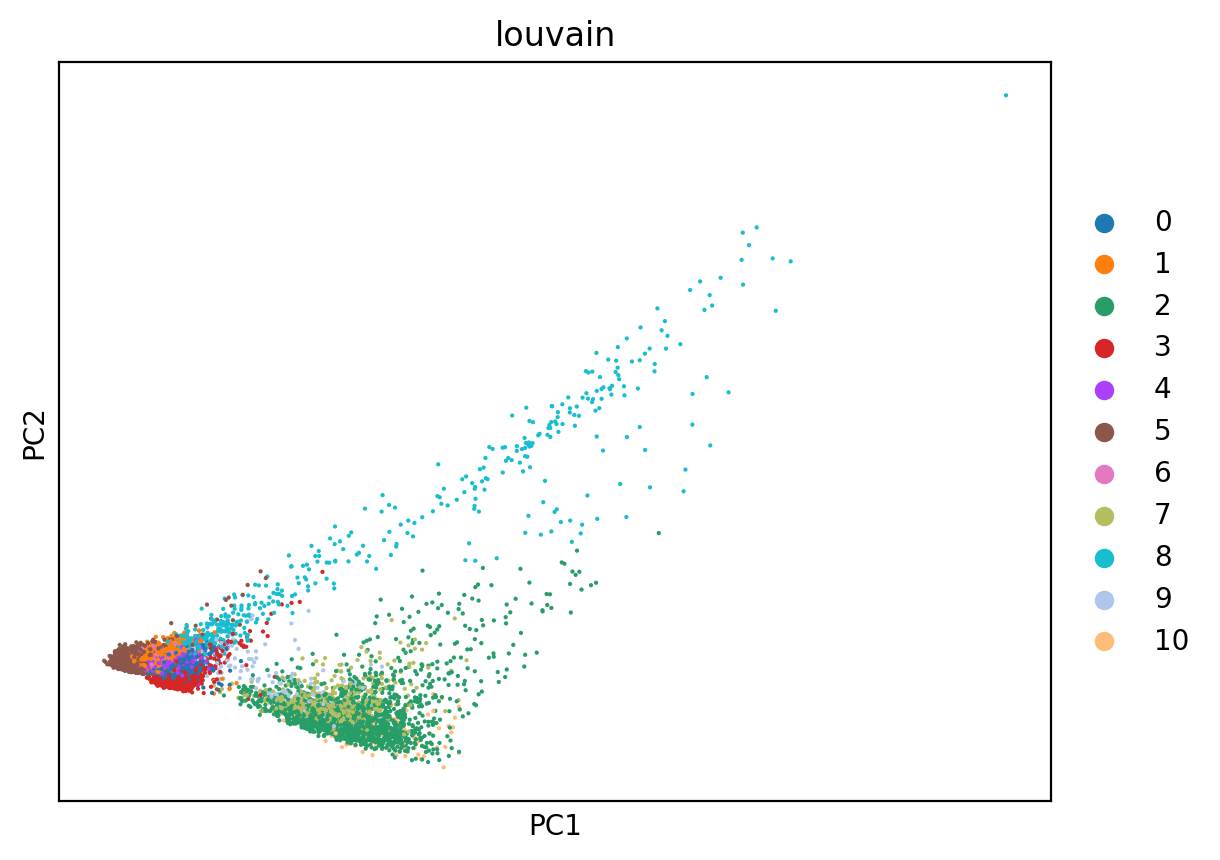

In [45]:
# Perform PCA and plot the projection to the first two dimensions, with points colored according to the Louvain clusters.
# fig, axe = plt.subplots(1, 2, figsize=(10, 7))
# for adata, ax in zip(adatas, axe):
#     sc.pl.pca(adata, color='louvain', show=False, ax=ax)
sc.pl.pca(adata, color='louvain')

In [46]:
# perform t-sne on top 10 pcs
sc.tl.tsne(adata, n_pcs=10)

/Users/liu.yak/anaconda3/envs/bioinfo/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


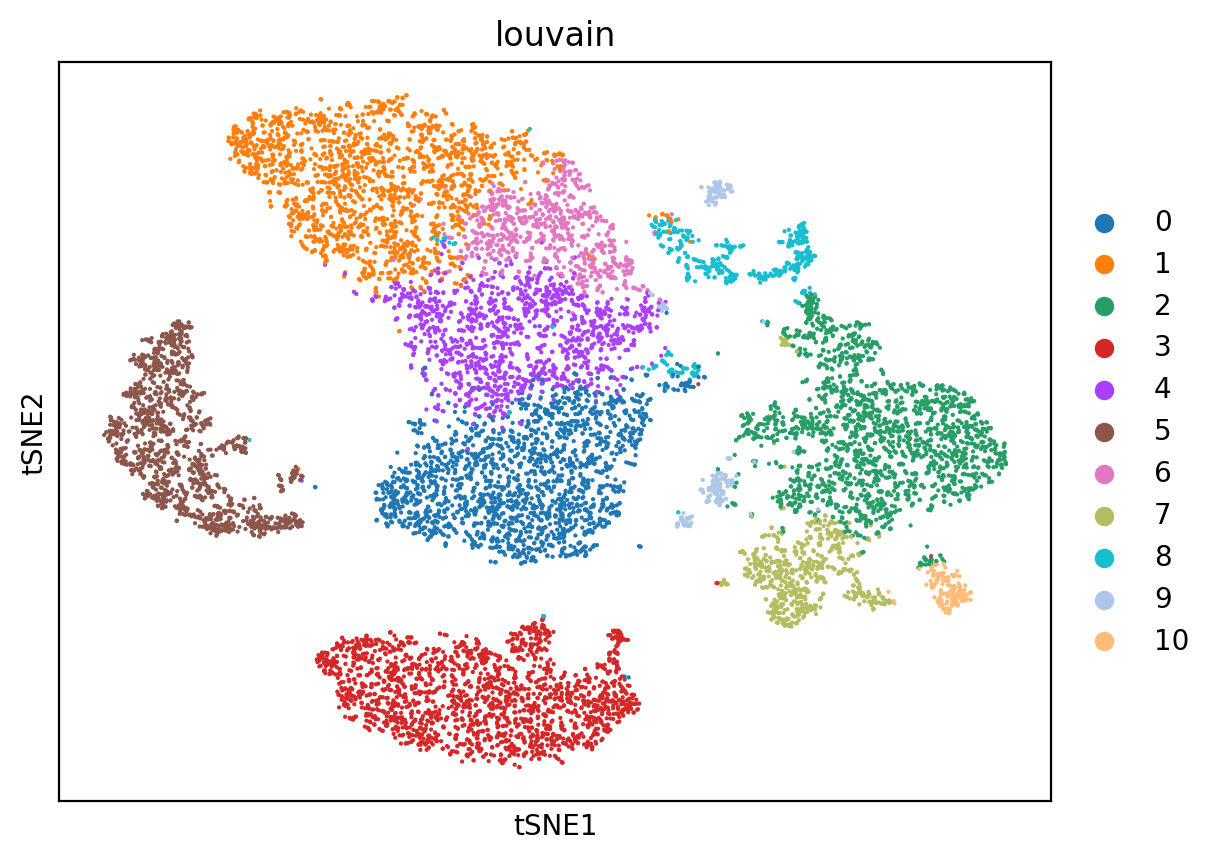

In [47]:
sc.pl.tsne(adata, color=['louvain'])

In [48]:
samples = []
for i in adata.obs.index.values:
    samples.append(i[-1])

In [51]:
adata.obs['samples'] = samples

/Users/liu.yak/anaconda3/envs/bioinfo/lib/python3.10/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/liu.yak/anaconda3/envs/bioinfo/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/liu.yak/anaconda3/envs/bioinfo/lib/python3.10/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/liu.yak/anaconda3/envs/bioinfo/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/liu.yak/anaconda3/envs/bioinfo/lib/python3.10/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to m

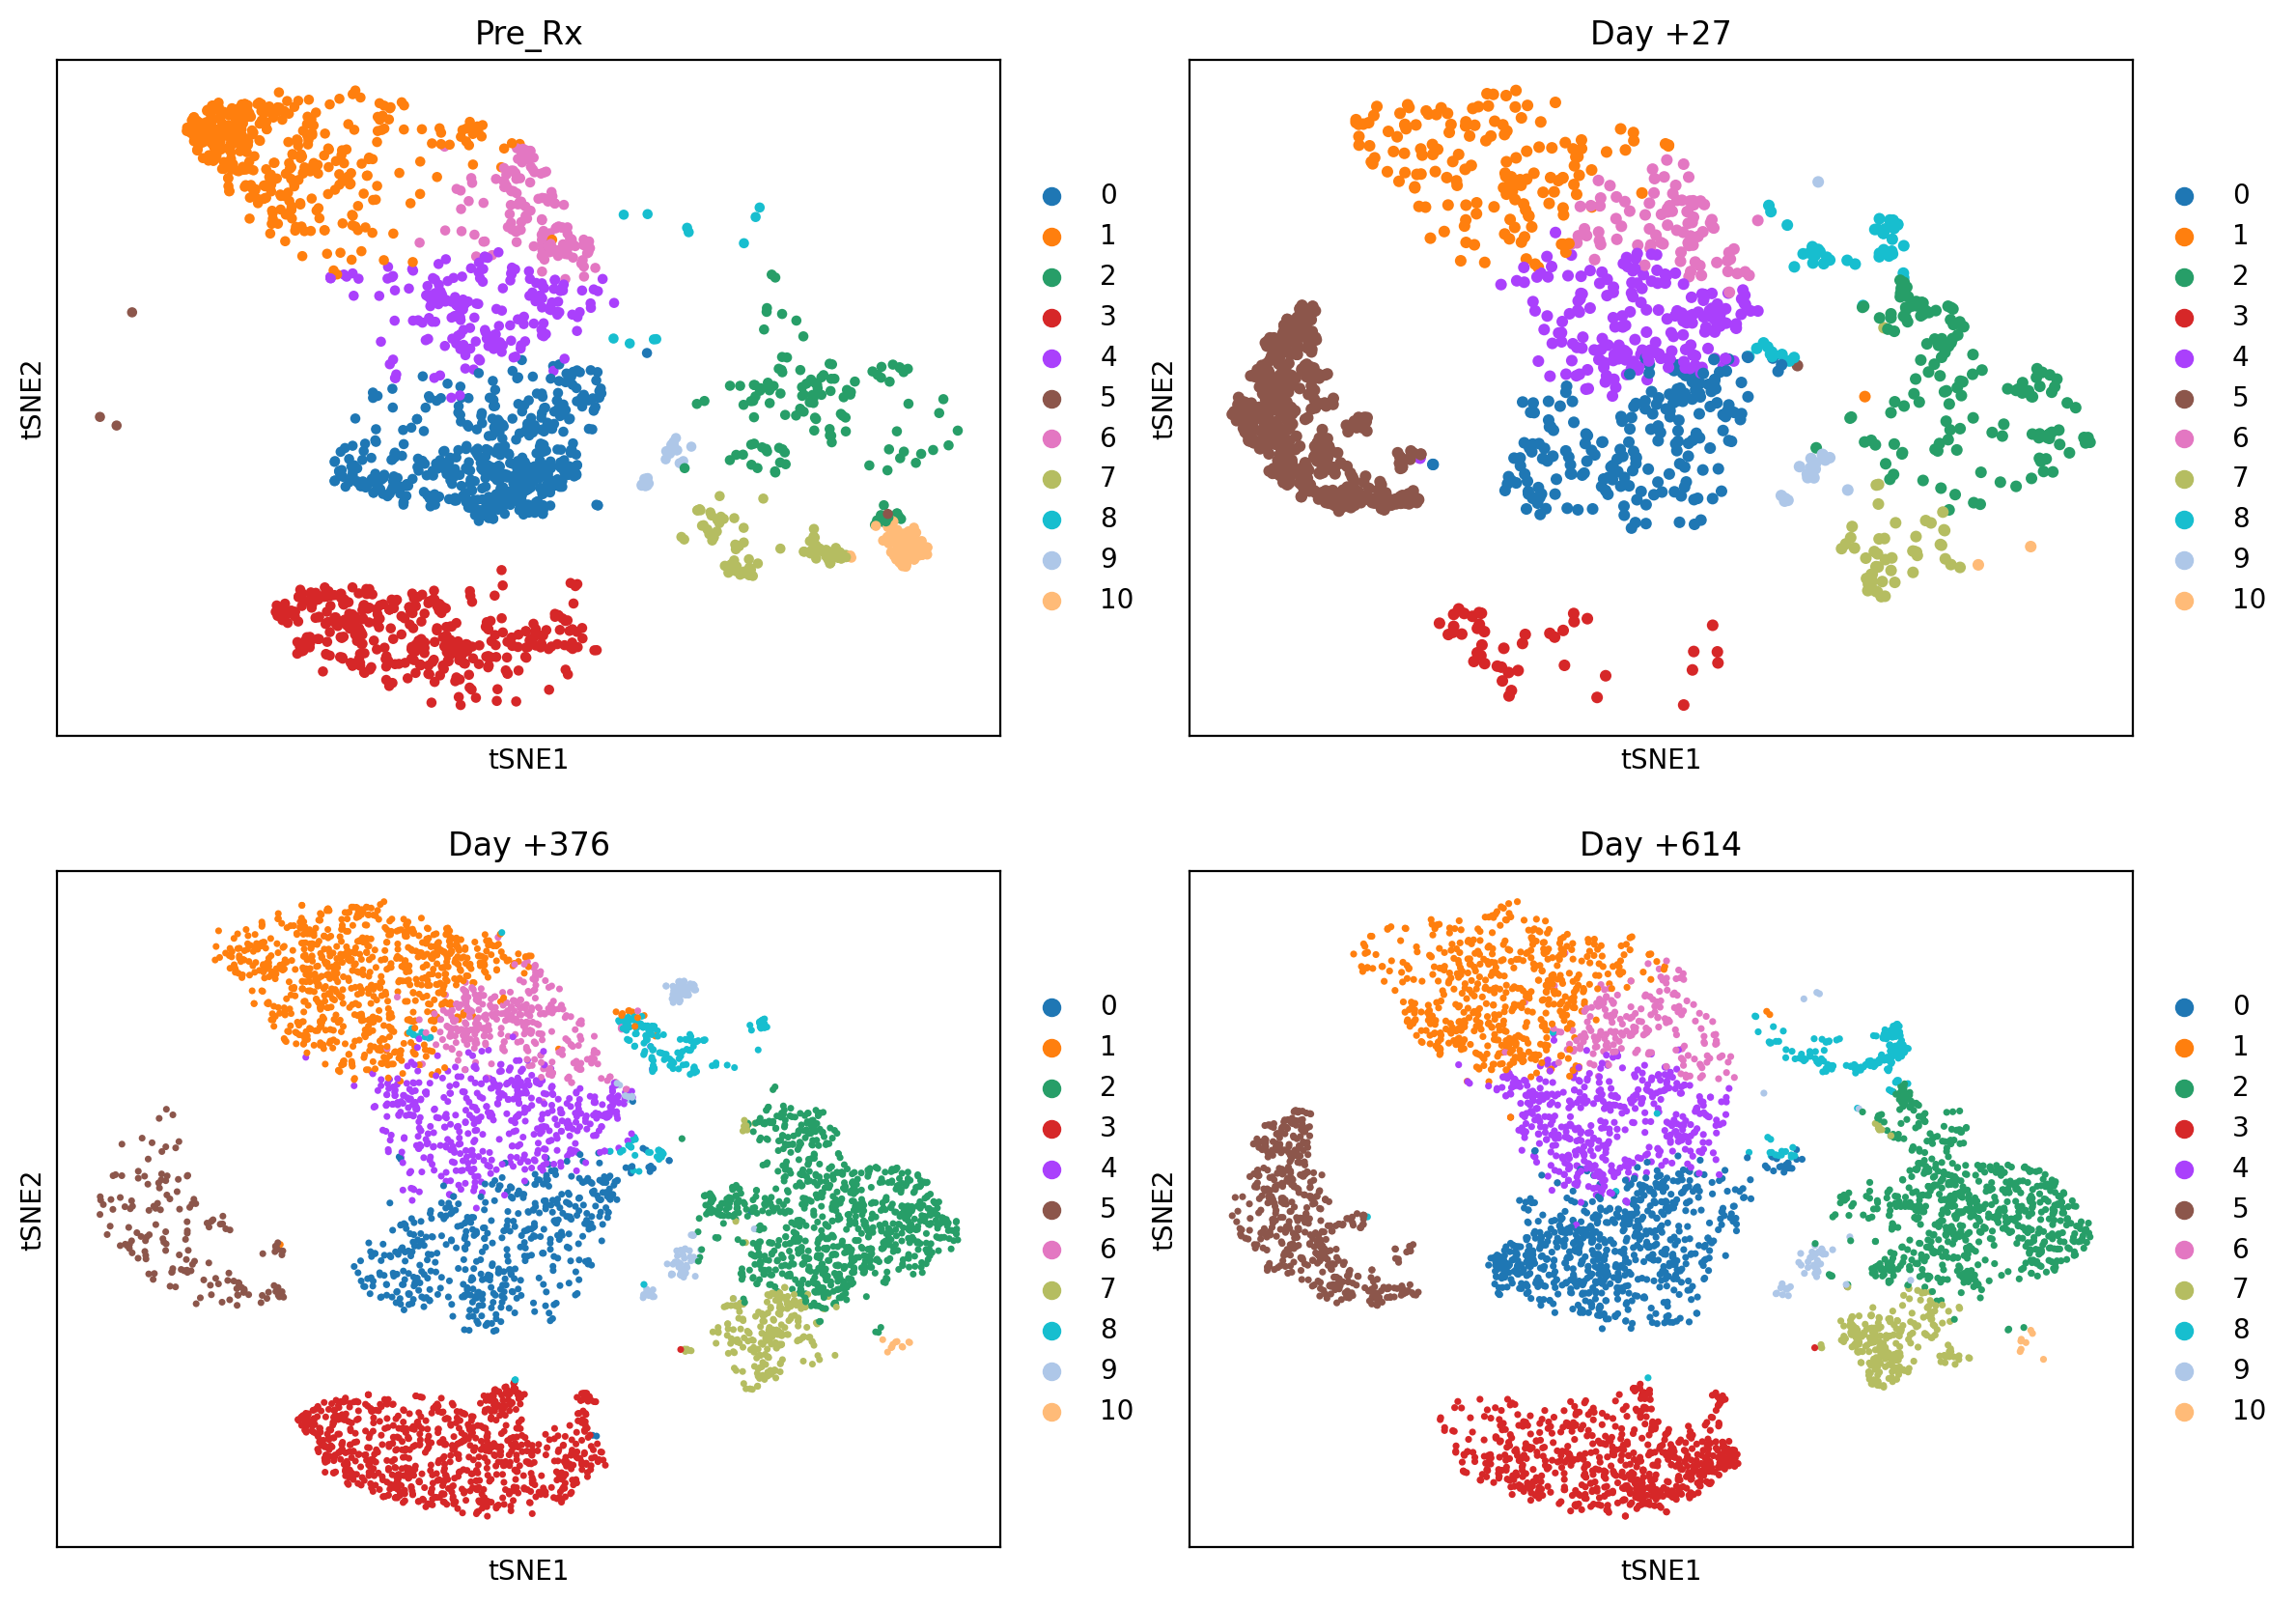

In [58]:
titles = ['Pre_Rx', 'Day +27', 'Day +376', 'Day +614']
fig, axe = plt.subplots(2, 2, figsize=(10,10))
for i, ax, t in zip(range(1,5), axe.flatten(), titles):
    f = adata.obs['samples'] == str(i)
    sc.pl.tsne(adata[f], color=['louvain'], ax=ax, show=False)
    ax.set_title(t)
plt.subplots_adjust(right=1.2)